In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### NOTE: Imported all the necessary packages.

In [77]:
songs_2010 = pd.read_csv("2010.csv")
songs_2011 = pd.read_csv("2011.csv")
songs_2012 = pd.read_csv("2012.csv")
songs_2013 = pd.read_csv("2013.csv")
songs_2014 = pd.read_csv("2014.csv")
songs_2015 = pd.read_csv("2015.csv")
songs_2016 = pd.read_csv("2016.csv")
songs_2017 = pd.read_csv("2017.csv")
songs_2018 = pd.read_csv("2018.csv")
songs_2019 = pd.read_csv("2019.csv")

songs_2010.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2011.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2012.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2013.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2014.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2015.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2016.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2017.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2018.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)
songs_2019.rename(columns = {"Unnamed: 0":"ID"}, inplace = True)

frames = [songs_2010, songs_2011, songs_2012, songs_2013, songs_2014, songs_2015, songs_2016, songs_2017, songs_2018, songs_2019]
all_top_songs = pd.concat(frames)

#### NOTE: Collected all the csv files and made a list out of them and then concatanated all the elements of the list into one variable called all_top_songs.

In [48]:
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 30
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         603 non-null    int64 
 1   title      603 non-null    object
 2   artist     603 non-null    object
 3   top genre  603 non-null    object
 4   year       603 non-null    int64 
 5   bpm        603 non-null    int64 
 6   nrgy       603 non-null    int64 
 7   dnce       603 non-null    int64 
 8   dB         603 non-null    int64 
 9   live       603 non-null    int64 
 10  val        603 non-null    int64 
 11  dur        603 non-null    int64 
 12  acous      603 non-null    int64 
 13  spch       603 non-null    int64 
 14  pop        603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 75.4+ KB


#### NOTE: The info() method shows us that all the required columns are either integer or floats or not objects.

In [49]:
most_popular_song = all_top_songs["pop"].max()
most_popular_song = all_top_songs.loc[all_top_songs["pop"] == most_popular_song]
print("Most popular song in the dataset is: ")
most_popular_song["title"]

Most popular song in the dataset is: 


0    Memories
Name: title, dtype: object

#### NOTE: Most popular song is based on the maximum value of the pop column.

In [55]:
artist_who_has_most_songs = all_top_songs.groupby("artist")
artist_who_has_most_songs = artist_who_has_most_songs.size().sort_values(ascending = False)
print("The artist who has the most songs in the dataset is: ")
artist_who_has_most_songs.head(1)

The artist who has the most songs in the dataset is: 


artist
Katy Perry    17
dtype: int64

#### NOTE: Artist who has most songs is found by seeing which artist is present the most in the all_top_songs csv file. 

In [57]:
most_popular_genre = all_top_songs.groupby("top genre")
most_popular_genre = most_popular_genre.size().sort_values(ascending = False)
print("Most popular genre in the dataset is: ")
most_popular_genre.head(1)

Most popular genre in the dataset is: 


top genre
dance pop    327
dtype: int64

#### NOTE: Most popular genre is found by searching through the top genre column. The genre that is present most in the dataset is considered as the most popular genre

In [58]:
all_top_songs["title"] = all_top_songs["title"].str.strip()
all_top_songs["artist"] = all_top_songs["artist"].str.strip()
all_top_songs["top genre"] = all_top_songs["top genre"].str.strip()

#### NOTE: Removed all unnecessary whitespaces.

In [70]:
count = all_top_songs[all_top_songs.duplicated(subset = ["title", "artist"], keep = "last")].shape[0]
print(f"There are about {count} songs in the dataset that are present more than once")

There are about 16 songs in the dataset that are present more than once


#### NOTE: Found all the duplicates. To find all the duplicates firstly we had to remove all the unnecessary whitespaces and then counted the number of songs based on both title and artist column to find the total number of duplicates.

<AxesSubplot:title={'center':'Relationship between popularity and dancability'}, xlabel='dnce'>

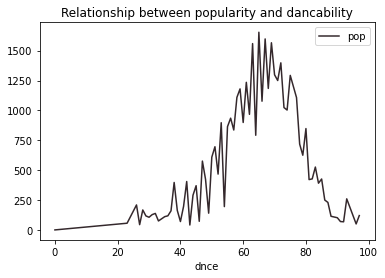

In [78]:
all_top_songs.groupby(["dnce"]).sum().plot(kind="line", color = "#34282C", title='Relationship between popularity and dancability', y="pop")

#### NOTE: The graph shows us that as the popularity increases dancability of that song increases. 

<AxesSubplot:title={'center':'Relationship between bpm and energy level'}, xlabel='bpm'>

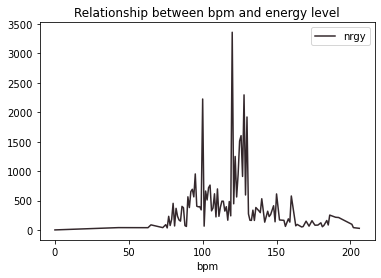

In [79]:
all_top_songs.groupby(["bpm"]).sum().plot(kind="line", color = "#34282C", title='Relationship between bpm and energy level', y="nrgy")

#### NOTE: The graph shows us that as the higher the bpm, the higher the energy level. 

In [75]:
genre_that_has_highest_energy = all_top_songs["nrgy"].max()
genre_that_has_highest_energy = all_top_songs.loc[all_top_songs["nrgy"] == genre_that_has_highest_energy]
print("The genres that have highest energy are: ")
genre_that_has_highest_energy["top genre"]

The genres that have highest energy are: 


50    big room
59    boy band
Name: top genre, dtype: object

#### NOTE: Two of the genres that has the highest energy and they are found in the nrgy column.

In [85]:
all_top_songs.to_csv(r'top_spotify_songs.csv')

#### NOTE: Exported the combined dataset into a new csv file named top_apotify_songs using the to_csv method.

In [94]:
recorded_live = all_top_songs[all_top_songs["live"]>=50]
recorded_live = recorded_live["live"].count()
all_songs = all_top_songs.shape[0]
percentage = recorded_live*100/all_songs
print(f"{percentage.round(2)}% of songs may have been recorded live.")

2.99% of songs may have been recorded live.


#### NOTE: The song that has been recorded most is based on the column live

In [97]:
acoustic = all_top_songs[all_top_songs["acous"]>=50]
acoustic = acoustic["acous"].count()
all_songs = all_top_songs.shape[0]
percentage = acoustic*100/all_songs
print(f"{percentage.round(2)}% of songs were acoustic.")

7.63% of songs were acoustic.


#### NOTE: The song that has been recorded most is based on the column live